# **Titanic: Machine Learning from Disaster**
### **Contents of the Notebook:**
* Loading test and train dataset
* Exploratory Data Analysis
* Checking missing/null value
* Feature engineering
* ML model implementation
* Feature Selection
* Model re-training
* Model (hyper-parameter) tuning
* Model re-training
* Implementing voting classifier
* Final model prediction & submission

### **Dataset Description:**

* The training set should be used to build the machine learning models. For the training set, they provided the outcome (also known as the “ground truth”) for each passenger. 
* The data has been split into two groups:
  * training set (train.csv)
  * test set (test.csv)
* Kaggle Titanic: Machine Learning from Disaster dataset Link : https://www.kaggle.com/c/titanic/data

Let's jump in :)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


### **Import Necessary Library**

In [2]:
import pandas as pd
import numpy as np

# Data visualisation & images
import matplotlib.pyplot as plt
import seaborn as sns

# Pipeline and machine learning algorithms
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# Model fine-tuning and evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

%matplotlib inline

### **Loading Train and Test Dataset**

In [3]:
#Load the train and test data from the dataset
df_train=pd.read_csv('../input/titanic/train.csv')
df_test=pd.read_csv('../input/titanic/test.csv')

In [4]:
# Join all data into one file
ntrain = df_train.shape[0]
ntest = df_test.shape[0]

# Creating y_train variable; we'll need this when modelling, but not before
y_train = df_train['Survived'].values

# Saving the passenger ID's ready for our submission file at the very end
passId = df_test['PassengerId']

# Create a new all-encompassing dataset
data = pd.concat((df_train, df_test))

# Printing overall data shape
print("data size is: {}".format(data.shape))

data size is: (1309, 12)


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Returning descriptive statistics of the train dataset
df_train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Chaffee, Mr. Herbert Fuller",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### **Feature Description:**
* The **Survived** variable is our outcome or dependent variable. It is a binary nominal datatype of 1 for survived and 0 for did not survive. 

* The **PassengerID** and **Ticket** variables are assumed to be random unique identifiers, that have no impact on the outcome variable. Thus, they will be excluded from analysis.
* The **Pclass** variable is an ordinal datatype for the ticket class where, 1 = upper class, 2 = middle class, and 3 = lower class.
* The **Name** variable is a nominal datatype. It could be used in feature engineering to derive the gender from title, family size from surname, and  socio-economic status(SES) from titles like doctor or master. Since these variables already exist, we'll make use of it to see if title, like master, makes a difference.
* The **Sex** and **Embarked** variables are a nominal datatype. They will be converted to dummy variables for mathematical calculations.
* The **Age** and **Fare** variable are continuous quantitative datatypes.
* The **SibSp** represents number of related siblings/spouse aboard and **Parch** represents number of related parents/children aboard. Both are discrete quantitative datatypes. This can be used for feature engineering to create a family size and is alone variable.
* The **Cabin** variable is a nominal datatype that can be used in feature engineering for approximate position on ship when the incident occurred and SES from deck levels.

# **Exploratory Data Analysis**

Before we can know how much (or little) feature engineering is needed, we need to have a good sense of what we're working with. The simple explorations discussed above are useful in terms of getting a holistic view of the overall dataset. To understand more about specific features, it is considered best practice to visualise it first. Now. let's walk through some simple visualisations, beginning with a correlation matrix.
### **Visualising The Train Data**

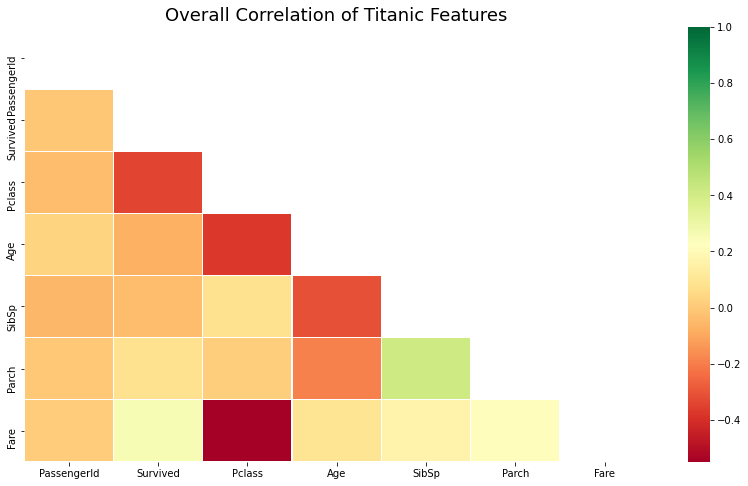

In [10]:
# Initiate correlation matrix
corr = df_train.corr()  # Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. 
# Set-up mask
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set-up figure
plt.figure(figsize=(14, 8))
# Title
plt.title('Overall Correlation of Titanic Features', fontsize=18)
# Correlation matrix
sns.heatmap(corr, mask=mask, annot=False,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

Perhaps not the most insightful view at this stage given that some features are pending engineering, however a visible correlation does exist between Survived and Pclass and Fare. Age, SibSp & Parch would also seem like logical predictors and it would be expected that after these variables have been preprocessed their correlation to Survived will increase.

Let's get an initial sense of these features then, beginning with the target: Survived.

0    549
1    342
Name: Survived, dtype: int64


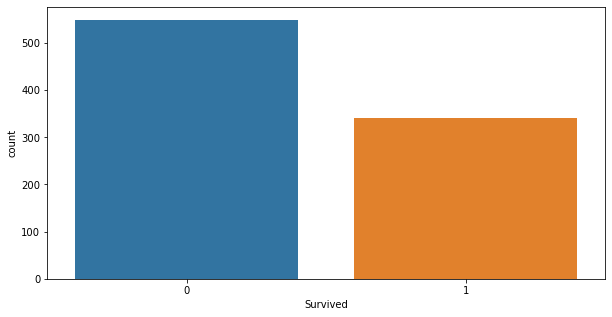

In [11]:
# Feature: Survived

# Plot for survived
fig = plt.figure(figsize = (10,5))
sns.countplot(x='Survived', data = df_train)
print(df_train['Survived'].value_counts())

Text(0.5, 1.0, 'Percentage Survived by Ticket Class')

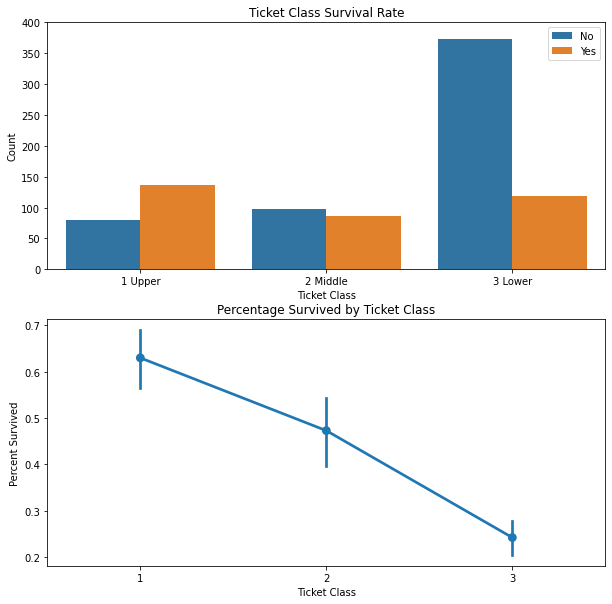

In [12]:
# Feature: Pclass
# Bar chart of each Pclass type
fig = plt.figure(figsize = (10,10))
ax1 = plt.subplot(2,1,1)
ax1 = sns.countplot(x = 'Pclass', hue = 'Survived', data = df_train)
ax1.set_title('Ticket Class Survival Rate')
ax1.set_xticklabels(['1 Upper','2 Middle','3 Lower'])
ax1.set_ylim(0,400)
ax1.set_xlabel('Ticket Class')
ax1.set_ylabel('Count')
ax1.legend(['No','Yes'])

# Pointplot Pclass type
ax2 = plt.subplot(2,1,2)
sns.pointplot(x='Pclass', y='Survived', data=df_train)
ax2.set_xlabel('Ticket Class')
ax2.set_ylabel('Percent Survived')
ax2.set_title('Percentage Survived by Ticket Class')

### **Observaion:**
from the above figure we came to know that,the higher class ticket, the more likely one is to have survived. 

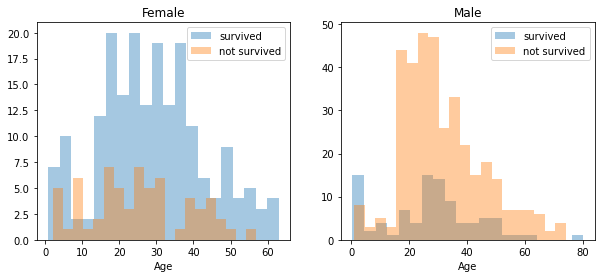

In [13]:
# Feature: Age
# Bar chart of age mapped against sex. For now, missing values have been dropped and will be dealt with later
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df_train[df_train['Sex']=='female']
men = df_train[df_train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

### **Observation:**
These graphs reveal that overall women were much more likely to survive than men, and this is largely regardless of age. For both sexes, it appears that chances of survival are more likely at a younger age, which is what might have been expected. From the age of 20, it was consistently more likely that men would not have survived, up until their age approached 80. For women, apart from a potentially anomalous finding around the 8-9 bracket, they were always more likely to survive.

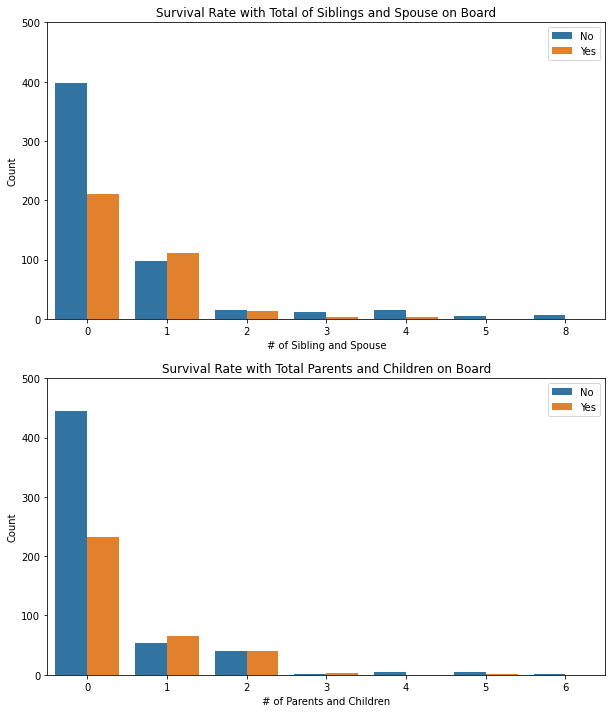

In [14]:
# Feature: SibSp & ParCh
# Plotting survival rate vs Siblings or Spouse on board
fig = plt.figure(figsize = (10,12))
ax1 = plt.subplot(2,1,1)
ax1 = sns.countplot(x = 'SibSp', hue = 'Survived', data = df_train)
ax1.set_title('Survival Rate with Total of Siblings and Spouse on Board')
ax1.set_ylim(0,500)
ax1.set_xlabel('# of Sibling and Spouse')
ax1.set_ylabel('Count')
ax1.legend(['No','Yes'],loc = 1)

# Plotting survival rate vs Parents or Children on board
ax2 = plt.subplot(2,1,2)
ax2 = sns.countplot(x = 'Parch', hue = 'Survived', data = df_train)
ax2.set_title('Survival Rate with Total Parents and Children on Board')
ax2.set_ylim(0,500)
ax2.set_xlabel('# of Parents and Children')
ax2.set_ylabel('Count')
ax2.legend(['No','Yes'],loc = 1)

### **Observation:**
Not surprisingly, the structure of these two graphs appear similar, with a similar density of passengers featured within each count, with also a similar ratio of survived vs not survived. This adds further rationale for these two features to be combined, which will be performed at the Data Preprocessing stage.

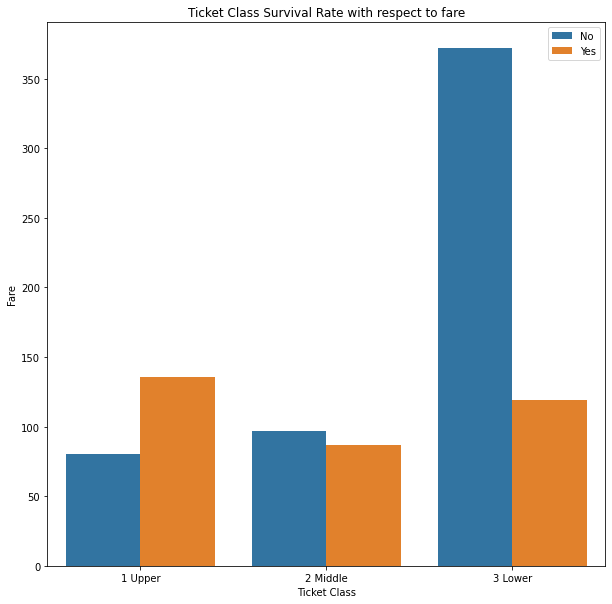

In [15]:
# Feature: Fare
# Bar chart of each Fare type
fig = plt.figure(figsize = (10,10))
ax1 = sns.countplot(x = 'Pclass', hue = 'Survived', data = df_train)
ax1.set_title('Ticket Class Survival Rate with respect to fare')
ax1.set_xticklabels(['1 Upper','2 Middle','3 Lower'])
ax1.set_xlabel('Ticket Class')
ax1.set_ylabel('Fare')
ax1.legend(['No','Yes'])

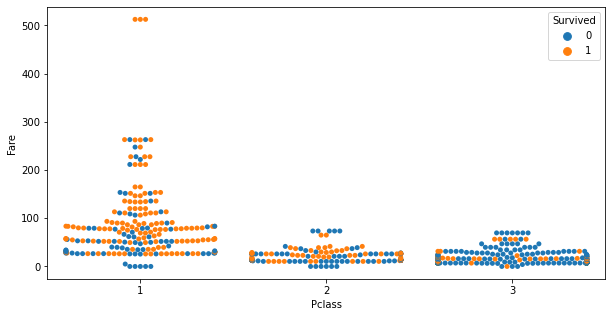

In [16]:
# Graph to display fare paid per the three ticket types
fig = plt.figure(figsize = (10,5))
sns.swarmplot(x="Pclass", y="Fare", data=df_train, hue='Survived')

### **Observation:**
Fare has been displayed per ticket type, revealing that those within Pclass 3 paid a similar fare to those in Pclass 2, but their chance of survival appears to be a lot lower. Pclass contains the highest fares, along with the highest rate of survivial, where orange points denotes the higher ratio .


### **Checking Missing Data**

In [17]:
print("TRAIN DATA:")
df_train.isnull().sum()

TRAIN DATA:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

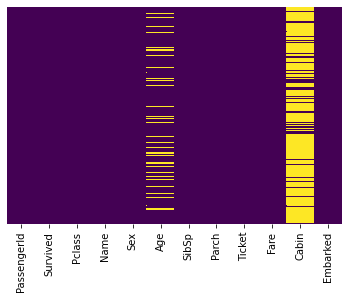

In [18]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [19]:
print("TEST DATA:")
df_test.isnull().sum()

TEST DATA:


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

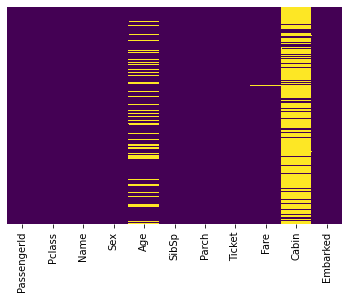

In [20]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')


### **Observations:**
**In case of Train Data:**
* 177 values are missing from Age feature.
* 687 values are missing from Cabin feature.
* 2 values are missing from Embarked feature.

**In case of test Data:**
* 86 values are missing from Age feature.
* 327 values are missing from Cabin feature.
* 1 value is missing from Cabin fare.

### **Feature engineering :**

1. Family Information

In [21]:
# Extract last name
data['Last_Name'] = data['Name'].apply(lambda x: str.split(x, ",")[0])

# Fill in missing Fare value by overall Fare mean
data['Fare'].fillna(data['Fare'].mean(), inplace=True)

# Setting coin flip (e.g. random chance of surviving)
default_survival_chance = 0.5
data['Family_Survival'] = default_survival_chance

# Grouping data by last name and fare - looking for families
for grp, grp_df in data[['Survived','Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId',
                           'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last_Name', 'Fare']):
    
    # If not equal to 1, a family is found 
    # Then work out survival chance depending on whether or not that family member survived
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            smax = grp_df.drop(ind)['Survived'].max()
            smin = grp_df.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):
                data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 1
            elif (smin == 0.0):
                data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 0

# Print the headline
print("Number of passengers with family survival information:", 
      data.loc[data['Family_Survival']!=0.5].shape[0])

Number of passengers with family survival information: 420


1.  **Group Information**

In [22]:
# If not equal to 1, a group member is found
# Then work out survival chance depending on whether or not that group member survived
for _, grp_df in data.groupby('Ticket'):
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            if (row['Family_Survival'] == 0) | (row['Family_Survival']== 0.5):
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (smin==0.0):
                    data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 0

# Print the headline
print("Number of passenger with family/group survival information: " 
      +str(data[data['Family_Survival']!=0.5].shape[0]))

Number of passenger with family/group survival information: 546


In [23]:
# Reset index for remaining feature engineering steps
data = data.reset_index(drop=True)
data = data.drop('Survived', axis=1)
data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last_Name,Family_Survival
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,0.5
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,1.0
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,0.5
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,0.5
1308,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,Peter,1.0


2. **Fare**

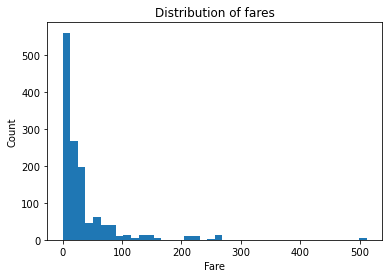

In [24]:
# Visualising fare data
plt.hist(data['Fare'], bins=40)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Distribution of fares')
plt.show()

In [25]:
# Turning fare into 4 bins due to heavy skew in data
data['Fare'] = pd.qcut(data['Fare'], 4)

# I will now use Label Encoder to convert the bin ranges into numbers
lbl = LabelEncoder()
data['Fare'] = lbl.fit_transform(data['Fare'])

Text(0.5, 1.0, 'Fare Bins')

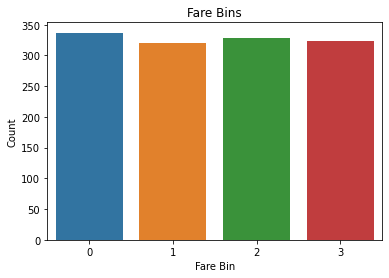

In [26]:
# Visualise new look fare variable
sns.countplot(data['Fare'])
plt.xlabel('Fare Bin')
plt.ylabel('Count')
plt.title('Fare Bins')

3. **Name**

In [27]:
# Inspecting the first five rows of Name
df_train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

The full names as they are will not be helpful to us, although, there's probably something useful within title e.g. categorising males and females, boys and girls. Therefore, i'm going to extract this data and create a new feature for Title, before binning Name.

In [28]:
# New function to return name title only
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

In [29]:
# Creating two lists of titles, one for each dataset
titles_data = sorted(set([x for x in data['Name'].map(lambda x: get_title(x))]))

# Printing list length and items in each list
print(len(titles_data), ':', titles_data)

18 : ['Capt', 'Col', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess']


Here, we got 18 unique title values which is a lot, and I anticipate that for many only a few observations exist, which isn't helpful. I'm going to keep this simple and band titles in one of four categories: Mr, Mrs, Master & Miss. To help me complete this I will define my own handy function - see below:

In [30]:
# New function to classify each title into 1 of 4 overarching titles
def set_title(x):
    title = x['Title']
    if title in ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady','Dona']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [31]:
# Applying the get_title function to create the new 'Title' feature
data['Title'] = data['Name'].map(lambda x: get_title(x))
data['Title'] = data.apply(set_title, axis=1)

In [32]:
# Printing values of the title column (checking function worked!)
print(data['Title'].value_counts())

Mr        782
Miss      264
Mrs       202
Master     61
Name: Title, dtype: int64


4. **Age**

In [33]:
# Returning NaN within Age across Train & Test set
print('Total missing age data: ', pd.isnull(data['Age']).sum())


Total missing age data:  263


In [34]:
# Check which statistic to use in imputation
print(data['Age'].describe(exclude='NaN'))

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64


Here,mean and percentile breakdown indicates multiple features converging around the 30 mark, which perhaps isn't surprising. Based on this it may be better to proceed with imputing with the median (middle) value. What i'm now going to do is group the dataset by the four different titles, and then impute the missing age values with the average age of each title, be that Mr, Mrs, Master or Miss. The below code completes this:

In [35]:
#Imputing Age within the train & test set with the Median, grouped by Pclass and title
data['Age'] = data.groupby('Title')['Age'].apply(lambda x: x.fillna(x.median()))

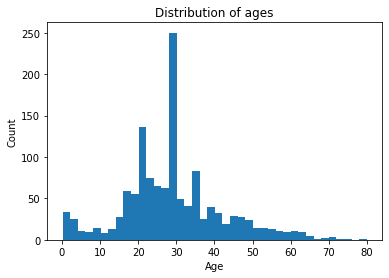

In [36]:
# Visualise new look age variable
plt.hist(data['Age'], bins=40)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of ages')
plt.show()

In [37]:
# Turning data into 4 bins due to heavy skew in data
data['Age'] = pd.qcut(data['Age'], 4)

# Transforming bins to numbers
lbl = LabelEncoder()
data['Age'] = lbl.fit_transform(data['Age'])

Text(0.5, 1.0, 'Age Bins')

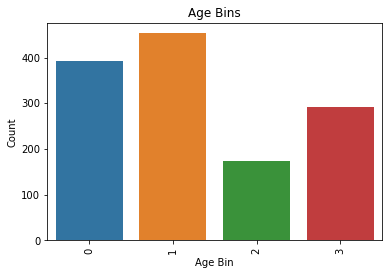

In [38]:
# Visualise new look fare variable
plt.xticks(rotation='90')
sns.countplot(data['Age'])
plt.xlabel('Age Bin')
plt.ylabel('Count')
plt.title('Age Bins')

In [39]:
#transferring the titles over to numbers ready for Machine Learning
data['Title'] = data['Title'].replace(['Mr', 'Miss', 'Mrs', 'Master'], [0, 1, 2, 3])

5. **Sex**

In [40]:
# Recoding sex to numeric values with use of a dictionary for machine learning model compatibility
data['Sex'] = data['Sex'].replace(['male', 'female'], [0, 1])

6. **Embarked**

In [41]:
# Inspecting the first five rows of Embarked
data['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [42]:
data['Embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

There are two missing values for Embarked - let's replace it with the most frequently occurring value. I'll then convert the letters to numeric values.

In [43]:
# Filling in missing embarked values with the mode (S)
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Converting to numeric values
data['Embarked'] = data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2])

7. **Cabin**

In [44]:
# Inspecting head of Cabin column
data['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

Upon closer inspection into cabin, we can see that it follows a Letter/Number format. A bit of extra internet research reveals that the letter actually refers to the floor in the titanic where each passenger resided. This information may be helpful in the prediction, e.g. did those in lower cabins have a smaller/larger chance of survival? Therefore we will begin by extracting the letter only from the Cabin column, and then labelling all NaN's with an 'Unknown' cabin reference.

In [45]:
# Labelling all NaN values as 'Unknown'
data['Cabin'].fillna('Unknown',inplace=True)

In [46]:
# Extracting the first value in the each row of Cabin
data['Cabin'] = data['Cabin'].map(lambda x: x[0])

In [47]:
# Return the counts of each unique value in the Cabin column
data['Cabin'].value_counts()

U    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

As previously seen, there is an overwhelming majority of unknown Cabins in the train dataset. Based on this, the best option here might be to create two groups: known and unknown. This will avoid overfitting on the sparse data by cabin level, and, with the help of a new function, is what will be computed next.

In [48]:
# New function to classify known cabins as 'Known', otherwise 'Unknown'
def unknown_cabin(cabin):
    if cabin != 'U':
        return 1
    else:
        return 0
    
# Applying new function to Cabin feature
data['Cabin'] = data['Cabin'].apply(lambda x:unknown_cabin(x))

8. **SibSp & Parch**

In [49]:
# Creating two features of relatives and not alone
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['IsAlone'] = 1 #initialize to yes/1 is alone
data['IsAlone'].loc[data['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [50]:
# Final look at the data
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last_Name,Family_Survival,Title,FamilySize,IsAlone
0,1,3,"Braund, Mr. Owen Harris",0,0,1,0,A/5 21171,0,0,0,Braund,0.5,0,2,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,3,1,1,Cumings,0.5,2,2,0
2,3,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,0,0,Heikkinen,0.5,1,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,1,0,Futrelle,0.0,2,2,0
4,5,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,0,0,Allen,0.5,0,1,1


In [51]:
# Dropping what we know need for Machine Learning
data = data.drop(['Name', 'Parch', 'SibSp', 'Ticket', 'Last_Name', 'PassengerId'], axis = 1)

### **Machine Learning Implementation**
Before we can fit models, a few more steps are needed in order to get the data in the correct shape for modelling. This involves re-splitting the train & test datasets, followed by setting up our X_train & X_test variables. Note that we already have our y_train variable from before. We don't have a y_test variable, this would be the survival stat per users in the test set, and this is what we are looking to predict!

In [52]:
# Return to train/test sets
train = data[:ntrain]
test = data[ntrain:]

In [53]:
# Set up feature and target variables in train set, and remove Passenger ID from test set
X_test = test
X_train = train

# Scaling data to support modelling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
# Initiate 11 classifier models
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

# Prepare lists
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
scores = []

# Sequentially fit and cross validate all models
for mod in models:
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores.append(acc.mean())

In [55]:
# Creating a table of results, ranked highest to lowest
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier'],
    'Score': scores})

result_df = results.sort_values(by='Score', ascending=False).reset_index(drop=True)
result_df.head(11)

,Model,Score
0,SVC,0.855194
1,Gradient Boosting,0.852959
2,Gaussian Process,0.847366
3,Logistic Regression,0.844007
4,AdaBoost,0.841760
5,XGBoost,0.837291
6,Random Forest,0.830549
7,Bagging Classifier,0.829376
8,Extra Trees,0.828290
9,K Nearest Neighbour,0.804719


(0.8, 0.86)

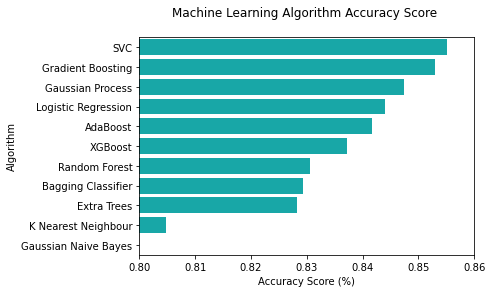

In [56]:
# Plot results
sns.barplot(x='Score', y = 'Model', data = result_df, color = 'c')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.xlim(0.80, 0.86)

Now, we want to now see how heavily each feature was leaned in the modelling process. Let's look at what feature XGBoost found most useful when achieved the top score in round one. To help present this data i'm going to construct my own gragh - code below.



In [57]:
# Function for new graph
def importance_plotting(data, x, y, palette, title):
    sns.set(style="whitegrid")
    ft = sns.PairGrid(data, y_vars=y, x_vars=x, size=5, aspect=1.5)
    ft.map(sns.stripplot, orient='h', palette=palette, edgecolor="black", size=15)
    
    for ax, title in zip(ft.axes.flat, titles):
    # Set a different title for each axes
        ax.set(title=title)
    # Make the grid horizontal instead of vertical
        ax.xaxis.grid(False)
        ax.yaxis.grid(True)
    plt.show()

In [58]:
# Building feature importance into a DataFrame
fi = {'Features':train.columns.tolist(), 'Importance':xgb.feature_importances_}
importance = pd.DataFrame(fi, index=None).sort_values('Importance', ascending=False)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


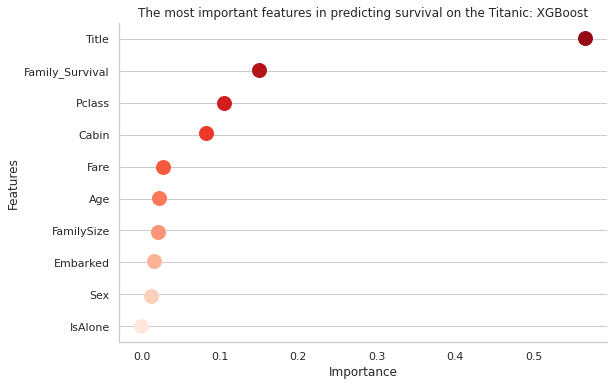

In [59]:
# Creating graph title
titles = ['The most important features in predicting survival on the Titanic: XGBoost']

# Plotting graph
importance_plotting(importance, 'Importance', 'Features', 'Reds_r', titles)

In [60]:
# Building feature importance into a DataFrame
fi = {'Features':train.columns.tolist(), 'Importance':np.transpose(log.coef_[0])}
importance = pd.DataFrame(fi, index=None).sort_values('Importance', ascending=False)

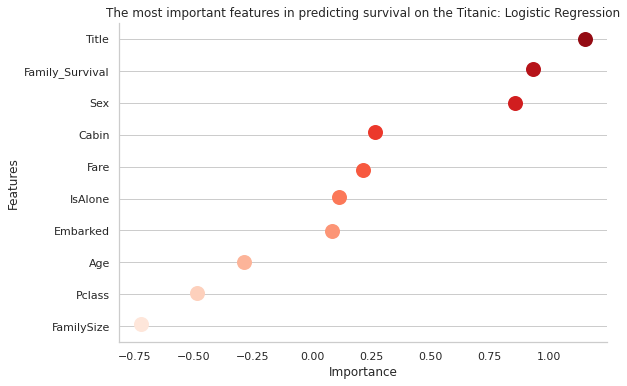

In [61]:
# Creating graph title
titles = ['The most important features in predicting survival on the Titanic: Logistic Regression']

# Plotting graph
importance_plotting(importance, 'Importance', 'Features', 'Reds_r', titles)

### **Feature selection**

In [62]:
# Getting feature importances for the 5 models where we can
gbc_imp = pd.DataFrame({'Feature':train.columns, 'gbc importance':gbc.feature_importances_})
xgb_imp = pd.DataFrame({'Feature':train.columns, 'xgb importance':xgb.feature_importances_})
ran_imp = pd.DataFrame({'Feature':train.columns, 'ran importance':ran.feature_importances_})
ext_imp = pd.DataFrame({'Feature':train.columns, 'ext importance':ext.feature_importances_})
ada_imp = pd.DataFrame({'Feature':train.columns, 'ada importance':ada.feature_importances_})

# Merging results into a single dataframe
importances = gbc_imp.merge(xgb_imp, on='Feature').merge(ran_imp, on='Feature').merge(ext_imp, on='Feature').merge(ada_imp, on='Feature')

# Calculating average importance per feature
importances['Average'] = importances.mean(axis=1)

# Ranking top to bottom
importances = importances.sort_values(by='Average', ascending=False).reset_index(drop=True)

# Display
importances

,Feature,gbc importance,xgb importance,ran importance,ext importance,ada importance,Average
0,Title,0.525535,0.564881,0.232446,0.164792,0.14,0.325531
1,Family_Survival,0.210392,0.149764,0.152454,0.140389,0.14,0.158600
2,Pclass,0.123275,0.104984,0.099824,0.096493,0.12,0.108915
3,Sex,0.002290,0.011806,0.169861,0.254869,0.02,0.091765
4,FamilySize,0.034094,0.020816,0.082412,0.072043,0.24,0.089873
5,Age,0.024784,0.022853,0.085914,0.077364,0.16,0.074183
6,Cabin,0.038215,0.081818,0.044971,0.060015,0.06,0.057004
7,Fare,0.030821,0.026962,0.070590,0.068564,0.04,0.047387
8,Embarked,0.008423,0.016116,0.048300,0.046130,0.06,0.035794
9,IsAlone,0.002172,0.000000,0.013229,0.019341,0.02,0.010949


In [63]:
# Building feature importance into a DataFrame
fi = {'Features':importances['Feature'], 'Importance':importances['Average']}
importance = pd.DataFrame(fi, index=None).sort_values('Importance', ascending=False)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


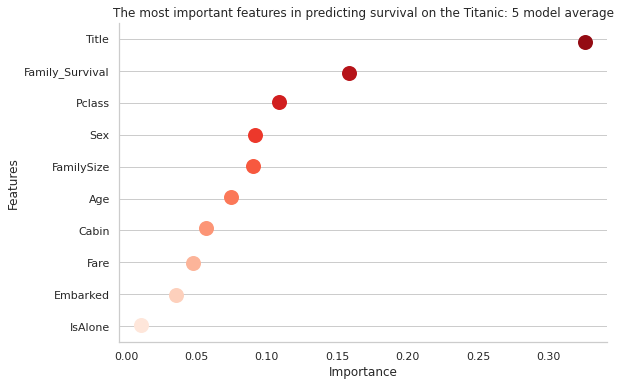

In [64]:
# Creating graph title
titles = ['The most important features in predicting survival on the Titanic: 5 model average']

# Plotting graph
importance_plotting(importance, 'Importance', 'Features', 'Reds_r', titles)

It looks clear now that Embarked & IsAlone really aren't helping us out, and therefore I am going to get rid of them. 

In [65]:
# Drop redundant features
train = train.drop(['Embarked','IsAlone'], axis=1)
test = test.drop(['Embarked', 'IsAlone'], axis=1)

# Re-build model variables
X_train = train
X_test = test

# Transform
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Model re-training**

In [66]:
# Initiate models
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier(random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
svc = SVC(probability=True)
ext = ExtraTreesClassifier(random_state=1)
ada = AdaBoostClassifier(random_state=1)
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier(random_state=1)

# Lists
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
scores_v2 = []

# Fit & cross validate
for mod in models:
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores_v2.append(acc.mean())

In [67]:
# Creating a table of results, ranked highest to lowest
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier'],
    'Original Score': scores,
    'Score with feature selection': scores_v2})

result_df = results.sort_values(by='Score with feature selection', ascending=False).reset_index(drop=True)
result_df.head(11)

,Model,Original Score,Score with feature selection
0,Gaussian Process,0.847366,0.857478
1,Gradient Boosting,0.852959,0.854095
2,SVC,0.855194,0.854070
3,Logistic Regression,0.844007,0.849625
4,XGBoost,0.837291,0.842921
5,AdaBoost,0.841760,0.841773
6,Random Forest,0.830549,0.838439
7,K Nearest Neighbour,0.804719,0.836142
8,Bagging Classifier,0.829376,0.835056
9,Extra Trees,0.828290,0.830587


(0.8, 0.86)

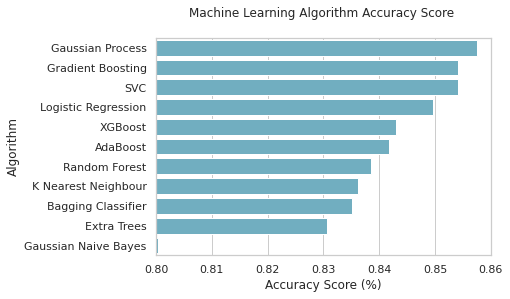

In [68]:
# Plot results
sns.barplot(x='Score with feature selection', y = 'Model', data = result_df, color = 'c')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.xlim(0.80, 0.86)

### **Model (hyper-parameter) tuning**
1. **Random Forest**

In [69]:
# Parameter's to search
n_estimators = [10, 25, 50, 75, 100]
max_depth = [3, None]
max_features = [1, 3, 5, 7]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [2, 4, 6, 8, 10]

# Setting up parameter grid
hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

# Run GridSearch CV
gd=GridSearchCV(estimator = RandomForestClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8597074885443476
RandomForestClassifier(max_features=7, min_samples_leaf=6, min_samples_split=6,
                       n_estimators=10)


[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:  7.7min finished


2. **K Neighbors Classifier**

In [70]:

# Parameter's to search
n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30]

# Setting up parameter grid
hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}

# Run GridSearch CV
gd=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 300 candidates, totalling 1500 fits
0.8529721925805035
KNeighborsClassifier(leaf_size=3, n_neighbors=10)


[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:   12.3s finished


3. **Logistic Regression**

In [71]:

# Parameter's to search
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

# Setting up parameter grid
hyperparams = {'penalty': penalty, 'C': C}

# Run GridSearch CV
gd=GridSearchCV(estimator = LogisticRegression(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: F

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for

0.8450944699014501
LogisticRegression(C=21.544346900318832)


4. **XGBoost**

In [72]:
# Parameter's to search
learning_rate = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
n_estimators = [10, 25, 50, 75, 100, 250, 500, 750, 1000]

# Setting up parameter grid
hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

# Run GridSearch CV
gd=GridSearchCV(estimator = XGBClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   44.4s finished


0.8451195781809051
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.0001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [73]:
max_depth = [3, 4, 5, 6, 7, 8, 9, 10]
min_child_weight = [1, 2, 3, 4, 5, 6]

hyperparams = {'max_depth': max_depth, 'min_child_weight': min_child_weight}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.0001, n_estimators=10), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8563115937480384
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.0001, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    2.4s finished


In [74]:
gamma = [i*0.1 for i in range(0,5)]

hyperparams = {'gamma': gamma}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.0001, n_estimators=10, max_depth=3, 
                                          min_child_weight=1), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.8563115937480384
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.0001, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


In [75]:
subsample = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
colsample_bytree = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
    
hyperparams = {'subsample': subsample, 'colsample_bytree': colsample_bytree}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.0001, n_estimators=10, max_depth=3, 
                                          min_child_weight=1, gamma=0), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 81 candidates, totalling 405 fits
0.8563115937480384
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.0001, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.65,
              tree_method='exact', validate_parameters=1, verbosity=None)


[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    3.9s finished


In [76]:
reg_alpha = [1e-5, 1e-2, 0.1, 1, 100]
    
hyperparams = {'reg_alpha': reg_alpha}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.0001, n_estimators=10, max_depth=3, 
                                          min_child_weight=1, gamma=0, subsample=0.6, colsample_bytree=0.9),
                                         param_grid = hyperparams, verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.8563115937480384
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.0001, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


5. **Gradient Boosting Classifier**

In [77]:

# Parameter's to search
learning_rate = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
n_estimators = [100, 250, 500, 750, 1000, 1250, 1500]

# Setting up parameter grid
hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

# Run GridSearch CV
gd=GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:  3.1min finished


0.8563115937480384
GradientBoostingClassifier(learning_rate=0.0005, n_estimators=1250)


6. **SVC**

In [78]:
# Parameter's to search
Cs = [0.001, 0.01, 0.1, 1, 5, 10, 15, 20, 50, 100]
gammas = [0.001, 0.01, 0.1, 1]

# Setting up parameter grid
hyperparams = {'C': Cs, 'gamma' : gammas}

# Run GridSearch CV
gd=GridSearchCV(estimator = SVC(probability=True), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8563178708179022
SVC(C=50, gamma=0.01, probability=True)


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   15.8s finished


7. **Extra Trees**

In [79]:

# Parameter's to search
n_estimators = [10, 25, 50, 75, 100]
max_depth = [3, None]
max_features = [1, 3, 5, 7]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [2, 4, 6, 8, 10]

# Setting up parameter grid
hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

# Run GridSearch CV
gd=GridSearchCV(estimator = ExtraTreesClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
0.8563115937480384
ExtraTreesClassifier(max_depth=3, max_features=5, min_samples_leaf=2,
                     n_estimators=10)


[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:  6.0min finished


8. **Adaboost**

In [80]:

# Parameter's to search
n_estimators = [10, 25, 50, 75, 100, 125, 150, 200]
learning_rate = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]

# Setting up parameter grid
hyperparams = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

# Run GridSearch CV
gd=GridSearchCV(estimator = AdaBoostClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 56 candidates, totalling 280 fits
0.8462494507563869
AdaBoostClassifier(learning_rate=0.5, n_estimators=25)


[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:   49.2s finished


9. **Gaussian Process**

In [81]:
# Parameter's to search
n_restarts_optimizer = [0, 1, 2, 3]
max_iter_predict = [1, 2, 5, 10, 20, 35, 50, 100]
warm_start = [True, False]

# Setting up parameter grid
hyperparams = {'n_restarts_optimizer': n_restarts_optimizer, 'max_iter_predict': max_iter_predict, 'warm_start': warm_start}

# Run GridSearch CV
gd=GridSearchCV(estimator = GaussianProcessClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 64 candidates, totalling 320 fits
0.8507124474295399
GaussianProcessClassifier(max_iter_predict=1)


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   42.5s finished


10. **Bagging Classifier**

In [82]:
# Parameter's to search
n_estimators = [10, 15, 20, 25, 50, 75, 100, 150]
max_samples = [1, 2, 3, 5, 7, 10, 15, 20, 25, 30, 50]
max_features = [1, 3, 5, 7]

# Setting up parameter grid
hyperparams = {'n_estimators': n_estimators, 'max_samples': max_samples, 'max_features': max_features}

# Run GridSearch CV
gd=GridSearchCV(estimator = BaggingClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 352 candidates, totalling 1760 fits
0.8551817211725566
BaggingClassifier(max_features=7, max_samples=50, n_estimators=75)


[Parallel(n_jobs=1)]: Done 1760 out of 1760 | elapsed:  3.0min finished


11. **Gaussian Naive Bayes**

Gaussian Naive Bayes doesn't have parameters to tune, so we're stuck with the current score. This algorithm is known to be designed to work best on text data (e.g. once passed into a matrix), so perhaps in comparison to the other algorithms, it's less of a surprise to see it performing less favourably on the Titanic dataset.

### **Model re-training**

In [83]:
# Initiate tuned models

ran = RandomForestClassifier(n_estimators=10,
                             max_depth=3, 
                             max_features=7,
                             min_samples_leaf=6, 
                             min_samples_split=6,  
                             random_state=1)

knn = KNeighborsClassifier(algorithm='auto', 
                           leaf_size=3, 
                           n_neighbors=10, 
                           weights='uniform')

log = LogisticRegression(C=21.544346900318832,
                         penalty='l2')

xgb = XGBClassifier(learning_rate=0.0001, 
                    n_estimators=10,
                    random_state=1)

gbc = GradientBoostingClassifier(learning_rate=0.0005,
                                 n_estimators=1250,
                                 random_state=1)

svc = SVC(C=50, gamma=0.01, probability=True)


ext = ExtraTreesClassifier(max_depth=3, 
                           max_features=5,
                           min_samples_leaf=2, 
                           min_samples_split=10,
                           n_estimators=10,
                           random_state=1)

ada = AdaBoostClassifier(learning_rate=0.5, 
                         n_estimators=25,
                         random_state=1)

gpc = GaussianProcessClassifier(max_iter_predict=1)


bag = BaggingClassifier(max_features=7, max_samples=50, n_estimators=75,random_state=1)

# Lists
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
scores_v3 = []

# Fit & cross-validate
for mod in models:
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores_v3.append(acc.mean())

In [84]:
# Creating a table of results, ranked highest to lowest
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier'],
    'Original Score': scores,
    'Score with feature selection': scores_v2,
    'Score with tuned parameters': scores_v3})

result_df = results.sort_values(by='Score with tuned parameters', ascending=False).reset_index(drop=True)
result_df.head(11)

,Model,Original Score,Score with feature selection,Score with tuned parameters
0,SVC,0.855194,0.854070,0.856317
1,Random Forest,0.830549,0.838439,0.856305
2,Gradient Boosting,0.852959,0.854095,0.856305
3,Gaussian Process,0.847366,0.857478,0.855218
4,Bagging Classifier,0.829376,0.835056,0.851848
5,Logistic Regression,0.844007,0.849625,0.848502
6,K Nearest Neighbour,0.804719,0.836142,0.848489
7,Extra Trees,0.828290,0.830587,0.848439
8,AdaBoost,0.841760,0.841773,0.844020
9,XGBoost,0.837291,0.842921,0.844020


(0.82, 0.86)

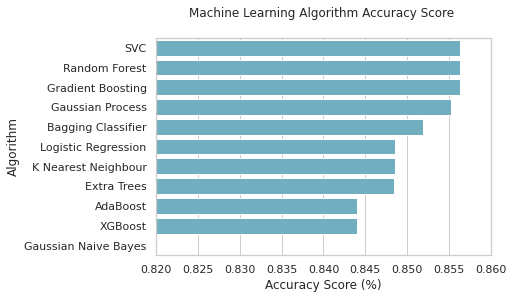

In [85]:
# Plot results
sns.barplot(x='Score with tuned parameters', y = 'Model', data = result_df, color = 'c')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.xlim(0.82, 0.86)

### **Voting Classifier**
Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

In [86]:
#Hard Vote or majority rules w/Tuned Hyperparameters
grid_hard = VotingClassifier(estimators = [('Random Forest', ran), 
                                           ('Logistic Regression', log),
                                           ('XGBoost', xgb),
                                           ('Gradient Boosting', gbc),
                                           ('Extra Trees', ext),
                                           ('AdaBoost', ada),
                                           ('Gaussian Process', gpc),
                                           ('SVC', svc),
                                           ('K Nearest Neighbour', knn),
                                           ('Bagging Classifier', bag)], voting = 'hard')

grid_hard_cv = model_selection.cross_validate(grid_hard, X_train, y_train, cv = 10, return_train_score=True)
grid_hard.fit(X_train, y_train)
 

print("Hard voting on train set score mean: {:.2f}". format(grid_hard_cv['train_score'].mean()*100))
print("Hard voting on test set score mean: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))


Hard voting on train set score mean: 85.72
Hard voting on test set score mean: 85.41


In [87]:
grid_soft = VotingClassifier(estimators = [('Random Forest', ran), 
                                           ('Logistic Regression', log),
                                           ('XGBoost', xgb),
                                           ('Gradient Boosting', gbc),
                                           ('Extra Trees', ext),
                                           ('AdaBoost', ada),
                                           ('Gaussian Process', gpc),
                                           ('SVC', svc),
                                           ('K Nearest Neighbour', knn),
                                           ('Bagging Classifier', bag)], voting = 'soft')

grid_soft_cv = model_selection.cross_validate(grid_soft, X_train, y_train, cv = 10, return_train_score=True)
grid_soft.fit(X_train, y_train)

print("Soft voting on train set score mean: {:.2f}". format(grid_soft_cv['train_score'].mean()*100)) 
print("Soft voting on test set score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))


Soft voting on train set score mean: 85.61
Soft voting on test set score mean: 85.29


### **Final model prediction & submission**

In [ ]:
# Final predictions
predictions = grid_hard.predict(X_test)

submission = pd.concat([pd.DataFrame(passId), pd.DataFrame(predictions)], axis = 'columns')

submission.columns = ["PassengerId", "Survived"]
submission.to_csv('titanic_submission.csv', header = True, index = False)

### **Thank you...! :)**

### **Please upvote if you like the notebook. This will keep me motivated... :)**